# GARCH

Let's just play around a little bit

In [1]:
import numpy as np
import pandas as pd

# local modules
from data_cleaning.import_data import import_data
from utils.plots import *
from utils.statistics import *

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

In [12]:
fx_pairs =[
    'USDRUB',
    'USDZAR',
    'USDBRL',
    'EURUSD',
    'USDJPY',
    'GBPUSD'
]
dfs = { pair : import_data(fx_pair=pair) for pair in fx_pairs }

In [14]:
dfs['GBPUSD']['test'] = np.maximum(0, 100*(dfs['GBPUSD']['px_ask'] - dfs['GBPUSD']['px_bid']) / ((dfs['GBPUSD']['px_ask'] + dfs['GBPUSD']['px_bid'])/2))
dfs['GBPUSD'].tail(5)

,v1m,v3m,v1y,px_last,px_bid,px_ask,log_ret,rolling_21d_realized_stdev,forward_rolling_21d_realized_stdev,normalized_bid_ask_spread,test
Dates,,,,,,,,,,,
2022-02-16,6.2850,6.7400,7.39,0.736052,0.735835,0.736269,-0.003539,3.893011,NaN,0.058884,0.058884
2022-02-17,6.8900,6.8600,7.41,0.734430,0.734214,0.734646,-0.002206,3.970841,NaN,0.058754,0.058754
2022-02-18,6.8775,6.8575,7.45,0.735889,0.735240,0.736540,0.001985,4.054218,NaN,0.176613,0.176613
2022-02-21,6.8900,6.9300,7.48,0.735186,0.734808,0.735619,-0.000956,3.864807,NaN,0.110282,0.110282
2022-02-22,6.8950,6.9500,7.51,0.736106,0.735727,0.736485,0.001251,3.595929,NaN,0.103055,0.103055


In [3]:
dfs['GBPUSD'].tail(5)

,v1m,v3m,v1y,px_last,px_bid,px_ask,log_ret,rolling_21d_realized_stdev,forward_rolling_21d_realized_stdev,normalized_bid_ask_spread
Dates,,,,,,,,,,
2022-02-16,6.2850,6.7400,7.39,0.736052,0.735835,0.736269,-0.003539,3.893011,NaN,0.058884
2022-02-17,6.8900,6.8600,7.41,0.734430,0.734214,0.734646,-0.002206,3.970841,NaN,0.058754
2022-02-18,6.8775,6.8575,7.45,0.735889,0.735240,0.736540,0.001985,4.054218,NaN,0.176613
2022-02-21,6.8900,6.9300,7.48,0.735186,0.734808,0.735619,-0.000956,3.864807,NaN,0.110282
2022-02-22,6.8950,6.9500,7.51,0.736106,0.735727,0.736485,0.001251,3.595929,NaN,0.103055


## Descriptive Statistics

In [ ]:
pd.set_option('display.max_rows', None)
for pair, df in dfs.items():
    description = (100*df['log_ret']).describe(percentiles=None)
    print(pair.upper())
    print(description)
    print(f"Skewness : {df['log_ret'].skew():.3f}")
    print(f"Excess kurtosis: {df['log_ret'].kurtosis()-3:.3f}")
    print(f"Mean (normalized) bid-ask spread: {df['normalized_bid_ask_spread'].mean(skipna=True):.3f}")
    print(f"Number of observations: {len(df.dropna()):.0f}")
    print('---------------------------')

In [ ]:
for key in dfs.keys():
    df = dfs[key]
    df.dropna(inplace=True)
    print(f"{key} has sample start: {df.index[0]}  --> {len(df)} observations")
    

In [ ]:
get_desctiptive_stats(df,plots=True)

# Plots

## Returns

In [ ]:
plot_returns(df=df)

## Implied Vol

In [ ]:
plot_iv(df=df,months_out='3m')

In [ ]:
plot_grid(df_dict=dfs, series='v1m',cols=2)  

## Bid-ask spreads (pips)

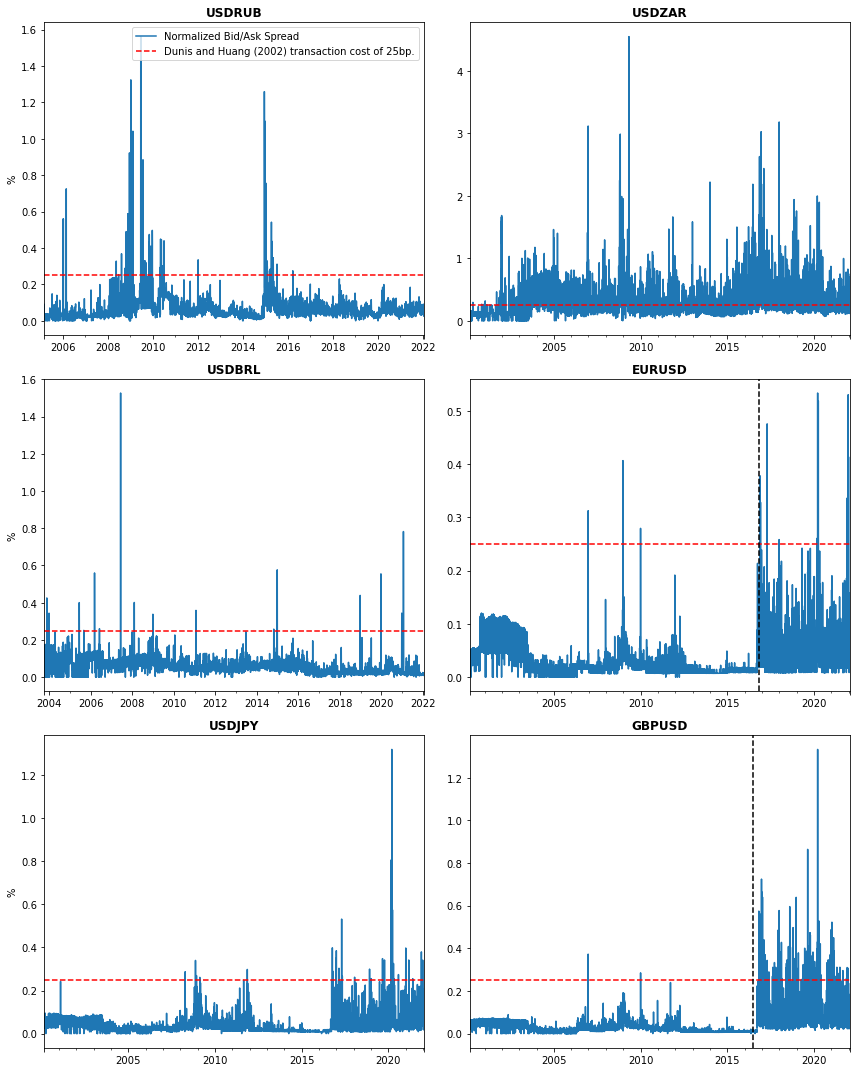

In [10]:
plot_grid(df_dict=dfs, series='normalized_bid_ask_spread',cols=2)

I get that sometimes they can get out of wack, but a spread of <-500 on EURUSD seems odd... 

In [ ]:
# lowest EURUSD bid-ask spread
timestamp = dfs['EURUSD'].dropna()['bid_ask_spread_pips'].idxmin()
dfs['EURUSD'].dropna().loc[timestamp]

In [ ]:
# highest USDRUB bid-ask spread
timestamp = dfs['USDRUB'].dropna()['bid_ask_spread_pips'].idxmax()
dfs['USDRUB'].dropna().loc[timestamp]

## Returns and IV grid

In [ ]:
plot_returns_and_vol(df_dict=dfs, vol_period='1m')

## Return distribution

In [ ]:
plot_return_distribution(df_dict=dfs, bins = 200)

In [ ]:
mu, std = stats.norm.fit(df['log_ret'].dropna()) 
print(mu)
print(std)

In [ ]:
degrees_of_freedom, loc, scale = stats.t.fit(df['log_ret'].dropna()) 


In [ ]:
degrees_of_freedom

In [ ]:
loc

In [ ]:
scale

In [ ]:
df['log_ret']